In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
tf.__version__

'2.9.1'

In [8]:
import numpy as np
import pandas as pd

In [9]:
keras.__version__

'2.9.0'

In [10]:
fashion_mist = keras.datasets.fashion_mnist

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mist.load_data()

In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
type(X_train_full)

numpy.ndarray

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255

In [16]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = ["Tshirts", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

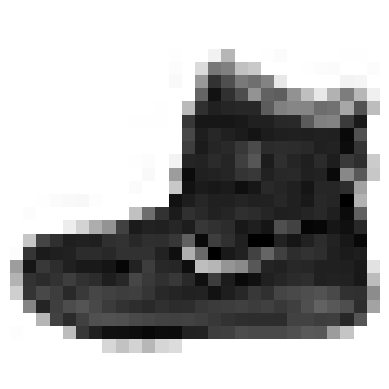

'Ankle boot'

In [18]:
_item = 0
plt.imshow(X_train_full[_item], cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
class_names[y_train_full[_item]]

In [19]:
model = keras.models.Sequential()

2022-09-24 11:24:37.420876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-24 11:24:37.421948: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Alternatively pass in layers to the constructor:
```python
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
```

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The above describes the model created.  Input layer has 784 inputs (28 x 28). 
The first hidden layer has 300 neurons, the 2nd hidden layer has 100, and the Ouptut layer gets 10 (1 for each class). 
The activation on the Hiden layers is set to relu, while the output gets softmax.

A nice utility to view the model.  Needs some additional pacakges installed.
```python
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)
```

Weights and biases of each layer can be inspected in the following way.

In [23]:
# Weights
model.layers[1].get_weights()[0].shape

(784, 300)

In [24]:
# Biases
model.layers[1].get_weights()[1].shape

(300,)

### Compilation:

<img width=800 src="../images/chapter10/a.png"/>

<img width=800 src="../images/chapter10/Screen Shot 2022-09-24 at 5.20.17 AM.png"/>

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Alternatively:
```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=[keras.metrics.sparse_categorical_accuracy])
```

We use the `sparse_categorical_crossentropy` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9
in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors), then we
would need to use the `categorical_crossentropy` loss instead. If we were doing binary classification (with one or more binary labels), then we
would use the `sigmoid` (i.e., logistic) activation function in the output layer instead of the `softmax`
activation function, and we would use the `binary crossentropy` loss.

To convert sparse labels (i.e., class indices) to one-hot vector labels, use the `keras.utils.to_categorical()` function. To go the other way round, use the `np.argmax` function with axis 1

In [26]:
categorical = keras.utils.to_categorical(y_train)

In [27]:
y_train.shape

(55000,)

In [28]:
categorical.shape

(55000, 10)

In [29]:
categorical[0], y_train[0]

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32), 4)

In [30]:
np.argmax(categorical, axis=1)

array([4, 0, 7, ..., 3, 0, 5])

### Training the model

In [31]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.7088 - accuracy: 0.7701 - val_loss: 0.5020 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4810 - accuracy: 0.8327 - val_loss: 0.4329 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4394 - accuracy: 0.8459 - val_loss: 0.4346 - val_accuracy: 0.8468
Epoch 4/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4124 - accuracy: 0.8553 - val_loss: 0.3894 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3948 - accuracy: 0.8614 - val_loss: 0.3767 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3769 - accuracy: 0.8674 - val_loss: 0.3826 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3651 - accuracy: 0.8703 - val_loss: 0.3664 - val_acc

> NOTE: 
> If the data set is skewed check `class_weight` and `sample_weight` arguments to the `fit()` call. 

### Evaluation

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
history.history

{'loss': [0.7087765336036682,
  0.4809949994087219,
  0.43939009308815,
  0.41237160563468933,
  0.394789457321167,
  0.3768981993198395,
  0.3650719225406647,
  0.35244104266166687,
  0.34290429949760437,
  0.33406803011894226,
  0.32481932640075684,
  0.3168281316757202,
  0.30990955233573914,
  0.3023405075073242,
  0.2962520718574524,
  0.29058900475502014,
  0.2841457724571228,
  0.2795414924621582,
  0.2729530930519104,
  0.2685432434082031,
  0.26302796602249146,
  0.2584143877029419,
  0.25395455956459045,
  0.2493090182542801,
  0.24444277584552765,
  0.24077577888965607,
  0.236075296998024,
  0.23314788937568665,
  0.2288559526205063,
  0.22435876727104187],
 'accuracy': [0.7700545191764832,
  0.8326908946037292,
  0.8459091186523438,
  0.8552727103233337,
  0.8614363670349121,
  0.8674363493919373,
  0.8702909350395203,
  0.8756726980209351,
  0.8789091110229492,
  0.8813999891281128,
  0.885272741317749,
  0.8859636187553406,
  0.8881636261940002,
  0.890181839466095,
  0.

In [34]:
frame = pd.DataFrame(history.history)
frame

loss  accuracy  val_loss  val_accuracy
0   0.708777  0.770055  0.501956        0.8252
1   0.480995  0.832691  0.432900        0.8508
2   0.439390  0.845909  0.434578        0.8468
3   0.412372  0.855273  0.389364        0.8678
4   0.394789  0.861436  0.376708        0.8700
5   0.376898  0.867436  0.382641        0.8682
6   0.365072  0.870291  0.366416        0.8730
7   0.352441  0.875673  0.372532        0.8664
8   0.342904  0.878909  0.355603        0.8722
9   0.334068  0.881400  0.352953        0.8742
10  0.324819  0.885273  0.337623        0.8810
11  0.316828  0.885964  0.326825        0.8844
12  0.309910  0.888164  0.325121        0.8852
13  0.302341  0.890182  0.325650        0.8850
14  0.296252  0.893982  0.350247        0.8718
15  0.290589  0.895636  0.332251        0.8806
16  0.284146  0.897636  0.325441        0.8824
17  0.279541  0.898364  0.316183        0.8890
18  0.272953  0.901291  0.314552        0.8884
19  0.268543  0.902691  0.301530        0.8924
20  0.263028  0.905200  0.347824        0.8732
21  0.258414  0.905909  0.303833        0.8928
22  0.253955  0.908909  0.301273        0.8920
23  0.249309  0.910964  0.309712        0.8874
24  0.244443  0.911873  0.306393        0.8870
25  0.240776  0.913236  0.316390        0.8888
26  0.236075  0.915800  0.292797        0.8936
27  0.233148  0.916273  0.307658        0.8904
28  0.228856  0.918091  0.288992        0.8960
29  0.224359  0.919255  0.299278        0.8946

(0.0, 1.0)

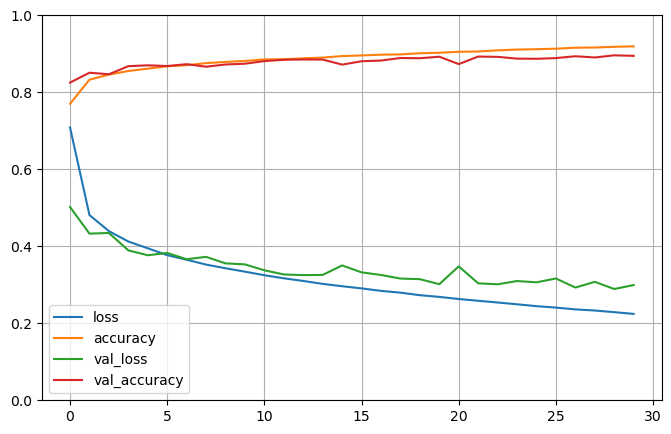

In [35]:
frame.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 63.6670 - accuracy: 0.8538


[63.667030334472656, 0.8537999987602234]

Seems like the performance on the test set is somewhat worse then the validation set. Normally this is expected since the hyperparamters
would be tuned to validation set.  In this scenario the hyperparamters were not tuned.  So it would seem like we just got a really bad luck. 
I would re-evaluate this model with a different hyperparamters and possible multiple validation sets. 

### Prediction 

In [37]:
X_new = X_test[:500]

In [40]:
y_proba = model.predict(X_new)

16/16 [==============================] - 0s 5ms/step


In [44]:
y_proba

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)